In [ ]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 13.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=703f19fa997527cb2cb64e97a1ff2700329ca4afb50a2e54d7c3cd2a44e45665
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


Porcentaje de accidentalidad: 
77.71428571428565 %


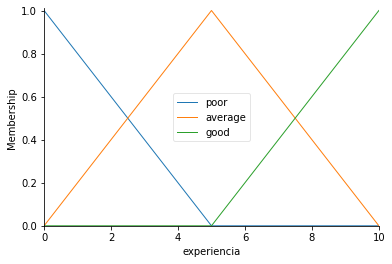

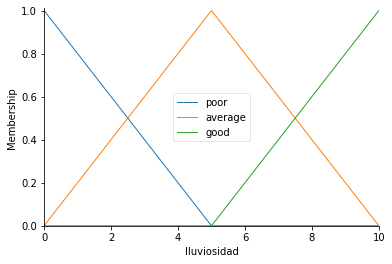

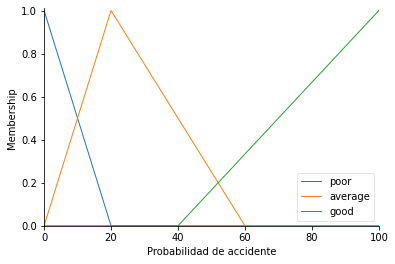

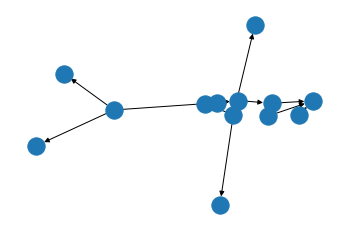

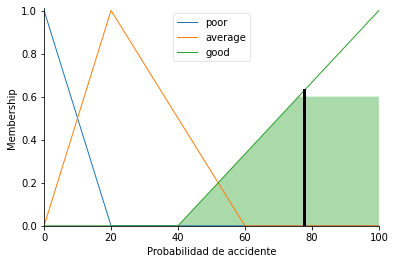

In [ ]:
# CONTROL DIFUSO API

# Elimina las advertencias
import warnings
warnings.filterwarnings('ignore')

# Importa las librerías
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

# Se crean los objetos antecedentes y consecuente a partir de las 
# variables del universo y las funciones de membresía
experiencia = ctrl.Antecedent(np.arange(0, 11, 1), 'experiencia')
clima = ctrl.Antecedent(np.arange(0, 11, 1), 'lluviosidad')
prob_accidentarse = ctrl.Consequent(np.arange(0, 101, 1), 'Probabilidad de accidente')

# La población de la función de membresía automática es posible con .automf (3, 5 o 7)
experiencia.automf(3)
clima.automf(3)

# Las funciones de membresía personalizadas se pueden construir interactivamente con la
# API Pythonic
prob_accidentarse['poor'] = fuzz.trimf(prob_accidentarse.universe, [0, 0, 20])
prob_accidentarse['average'] = fuzz.trimf(prob_accidentarse.universe, [0, 20, 60])
prob_accidentarse['good'] = fuzz.trimf(prob_accidentarse.universe, [40, 100, 100])

# Visualización con .view()
experiencia.view()
clima.view()
prob_accidentarse.view()

# Creación de las reglas
regla1 = ctrl.Rule(experiencia['good'] & clima['average'], prob_accidentarse['poor'])
regla2 = ctrl.Rule(experiencia['good'] & clima['good'], prob_accidentarse['average'])
regla3 = ctrl.Rule(experiencia['poor'] & clima['good'], prob_accidentarse['good'])

# Visualización de la regla 1
regla1.view()

# Generación del simulador
control_prob_accidentarse = ctrl.ControlSystem([regla1, regla2, regla3])
asignacion_prob_accidentarse = ctrl.ControlSystemSimulation(control_prob_accidentarse)


# Pasar entradas al ControlSystem usando etiquetas 'Antecedent' con Pythonic API
# Nota: si quiere pasar muchas entradas a la vez, usar .inputs (dict_of_data)
asignacion_prob_accidentarse.input['experiencia'] = 2
asignacion_prob_accidentarse.input['lluviosidad'] = 9

# Se obtiene el valor
asignacion_prob_accidentarse.compute()

# Se muestra la información
print("Porcentaje de accidentalidad: ")
print (asignacion_prob_accidentarse.output['Probabilidad de accidente'],'%')

# Se muestra la curva de asignación de propina
prob_accidentarse.view(sim=asignacion_prob_accidentarse)